<a href="https://colab.research.google.com/github/arara90/Python-Machine-learning/blob/master/%ED%95%98%EB%8A%98/190407/190407STUDY_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##의사 결정 나무(decision tree)
* 전체 자료를 몇 개의 소집단으로 분류(classification)하거나 예측(prediction)을 수
행하는 분석방법

![대체 텍스트](https://i.imgur.com/THaJKeR.png)

* CART(Classification And Regression Tree): 범주나 연속형 수치 모두 예측
* 목표변수가 이산형인 경우 --> 분류나무(classification tree), 목표변수가 연속형인 경우 --> 회귀나무(regression tree)


![대체 텍스트](https://mblogthumb-phinf.pstatic.net/20160101_10/santalsm_1451657047343X5iS5_JPEG/105%C8%B8_%B1%E2%BC%FA%BB%E7_%B1%E2%C3%E2%B9%AE%C1%A6_%C1%A4%BA%B8%B0%FC%B8%AE_90_03_03_02.jpg?type=w2)

* 맨 위의 마디를 뿌리노드(root node)라 하며, 이는 분류(또는 예측) 대상이 되는 모든 자료집단을 포함
* 상위 마디를 부모마디(parent node)라 하고, 하위 마디를 자식마디(child node)라 하며, 더 이상 분기되지 않는 마디를 최종노드(terminal node)
* 가지분할(split): 나무의 가지를 생성하는 과정
* 가지치기(pruning): 생성된 가지를 잘라내어 모형을 단순화하는 과정

![대체 텍스트](https://i.imgur.com/MVFcKwz.png)
* overfitting(과적합) 방지: terminal node가 너무 많으면 새로운 데이터에 대한 예측 성능인 일반화(generalization) 능력이 매우 떨어질 염려
* 데이터를 버리는 개념이 아니고 분기를 합치는 개념


###Classification Tree(분류나무)
* 상위노드에서 가지분할을 수행할 때, 분류(기준)변수와 분류 기준값의 선택 방법으로 카이제곱 통계량(Chi-square statistic)의 -값, 지니 지수(Gini index), 엔트로피 지수(entropy index) 등을 사용
* 카이제곱통계량의 p-값은 값이 작을수록 자식노드간의 이질성이 큼
* 지니 지수나 엔트로피 지수는 그 값이 클수록 자식노드 내의 이질성이 큼
* 따라서 이 값들이 가장 작아지는 방향으로 가지분할을 수행

![대체 텍스트](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRa4dFdfdBfYURORvb-S6_KxTVpafJTRAFbVqHJZbbEw9KzMTgy8Q)

* 불확실성 측도(uncertainty measure)인 지니 지수와 엔트로피 지수에 대한 정의는 다음과 같
다. 두 지수의 값의 범위는 다르나, 해석은 그 크기에 따라 유사
  * 지니 지수: 불균형을 계수화 한 것
  ![대체 텍스트](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Economics_Gini_coefficient.svg/800px-Economics_Gini_coefficient.svg.png)
  * A / (A+B)
  * 엔트로피 지수: messy한 정도
  
 ![대체 텍스트](https://i.imgur.com/n3MVwHW.png)

###의사결정나무의 분석과정
 목표변수와 관계가 있는 설명변수들의 선택

1.   목표변수와 관계가 있는 설명변수들의 선택
2.   분석목적과 자료의 구조에 따라 적절한 분리기준과 정지규칙을 정하여 의사결정 나무의 생성
3.   부적절한 나뭇가지는 제거: 가지치기
4.   이익(gain), 위험(risk), 비용(cost) 등을 고려하여 모형평가
5.   분류(classification) 및 예측(prediction) 수행

![대체 텍스트](https://t1.daumcdn.net/cfile/tistory/992428445C39DB1304)

###장단점
* 장점
  * 구조가 단순하여 해석이 용이
  * 유용한 입력변수의 파악
  * 예측변수간의 상호작용 및 비선형성을 고려하여 분석이 수행
  * 선형성, 정규성, 등분산성 등의 수학적 가정이 불필요한 모형

* 단점
  * 분류 기준값의 경계선 근방의 자료 값에 대해서는 오차가 클 수 있음(비연속성)
  * 로지스틱 회귀와 같이 각 예측변수의 효과를 파악하기 어려움
  * 새로운 자료에 대한 예측이 불안정할 수 있음
  * 이같은 문제를 극복하기 위해 등장한 모델 --> 랜덤포레스트(같은 데이터에 대해 의사결정나무를 여러 개 만들어 그 결과를 종합해 예측 성능을 높이는 기법)

##Exercise
iris 데이터로 Decision Tree를 테스트

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [0]:
# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


###Feature Scaling
* raw data 를 전처리하는 과정
* 키와 몸무게를 가지고 100m 달리기에 걸리는 시간을 예측한다고 하면, 키와 몸무게는 unit 이 다르기 때문에, 더 큰 값을 가진 키 값이 결과값에 더 큰 영향을 미칠 수도 있다.
* 이 때문에 raw data 를 전처리하는 과정이 필요하다.
* 방법론적으로 크게 Min-Max Normalization , Standardization (Z-score Normalization) 두가지가 있다.

1.    Min-Max Normalization
  * 데이터를 일반적으로 0~1 사이의 값으로 변환
  * 식) (X - X의 최소값) / (X의 최대값 - X의 최소값)
  * 데이터의 최소값, 최대값을 알 경우 사용

2.   Standardization
  * 모집단이 정규분포 (normal distribution, Gaussian distribution)을 따르는 경우 평균이 0, 표준편차는 1 인 표준 정규분포 (standard normal distribution)로 변경(표준화)
  * 기존 변수에 범위를 정규 분포로 변환한다.
  * 식) (X - X의 평균값) / (X의 표준편차)
  * 데이터의 최소값, 최대값을 모를 경우 사용
  
  https://iludaslab.tistory.com/61

In [3]:
# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
# tree 학습
iris_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [10]:
# 정확도
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.98


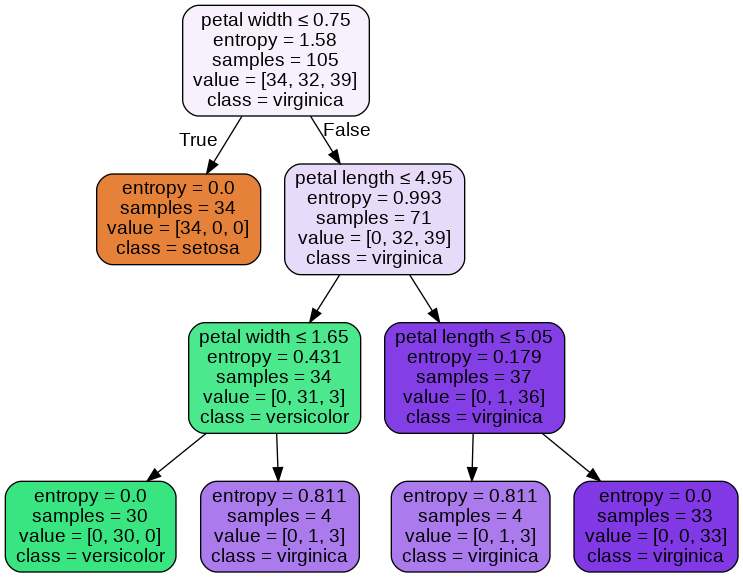

In [11]:
# 시각화
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(iris_tree, out_file=None, feature_names=['petal length', 'petal width'],
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())